#**PART 2: PYTHON ANALYTICS TASKS**

##**1. Clean the Dataset**

This step is crucial for ensuring the quality and reliability of your analysis.

##**1.1. Load the Dataset**

Objective: Read the data.csv file into a pandas DataFrame.

In [2]:
import pandas as pd

# Load the dataset with 'latin1' encoding
df = pd.read_csv('/content/drive/MyDrive/Covid_data_capstone_Project/rep_covid_rate/data.csv', encoding='latin1')

# Display the first few rows to understand its structure
print("Initial DataFrame Head:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
df.info()

Initial DataFrame Head:
   setting        date source    indicator_abbr  \
0  Albania  2020-06-15    WHO  covid_cases_rate   
1  Albania  2020-06-15    WHO  covid_cases_rate   
2  Albania  2020-06-15    WHO  covid_cases_rate   
3  Albania  2020-06-15    WHO  covid_cases_rate   
4  Albania  2020-06-15    WHO  covid_cases_rate   

                            indicator_name               dimension  \
0  COVID-19 cases (per 100 000 population)  Age (5 groups) (0-65+)   
1  COVID-19 cases (per 100 000 population)  Age (5 groups) (0-65+)   
2  COVID-19 cases (per 100 000 population)  Age (5 groups) (0-65+)   
3  COVID-19 cases (per 100 000 population)  Age (5 groups) (0-65+)   
4  COVID-19 cases (per 100 000 population)  Age (5 groups) (0-65+)   

      subgroup  estimate  se  ci_lb  ...  iso3  favourable_indicator  \
0    0-4 years      0.00 NaN    NaN  ...   ALB                     0   
1  15-24 years      0.00 NaN    NaN  ...   ALB                     0   
2  25-64 years      5.49 NaN    

##**1.2. Handle Missing Values**
**Objective:** Identify and address any missing values in the dataset.

**Strategy:**

**Identify:** Count missing values per column.

**Decide:** Based on the percentage and nature of missing data, choose an imputation strategy (e.g., mean, median, mode, forward/backward fill, or removal). For this dataset, columns like se, ci_lb, and ci_ub have many missing values. Given they are standard error and confidence interval bounds, and estimate is present, we might consider if these are critical for the chosen model or if they can be dropped. If they are crucial, more sophisticated imputation might be needed, but for a general overview, dropping them or imputing with 0 (if 0 implies no error/interval) could be options. For estimate itself, if there are missing values, we'd need to be careful.

In [3]:
    # Check for missing values
    print("\nMissing Values before handling:")
    print(df.isnull().sum())

    # Option 1: Drop columns with a high percentage of missing values (e.g., > 50%)
    # Let's assume 'se', 'ci_lb', 'ci_ub' have many NaNs based on the context.
    # We'll check the actual percentage first.
    missing_percentage = df.isnull().sum() / len(df) * 100
    print("\nPercentage of Missing Values:")
    print(missing_percentage[missing_percentage > 0])

    # Based on the context, 'se', 'ci_lb', 'ci_ub' are likely candidates for dropping
    # if they have a very high percentage of missing values and are not central to the primary analysis.
    # For this example, let's assume they are not critical and have high missing percentages.
    columns_to_drop_if_high_missing = ['se', 'ci_lb', 'ci_ub']
    df = df.drop(columns=columns_to_drop_if_high_missing, errors='ignore') # errors='ignore' prevents error if column doesn't exist

    # For other columns with missing values (if any, and if they are numerical),
    # consider imputation (e.g., mean, median) or forward/backward fill for time-series data.
    # For categorical columns, mode imputation or a new 'Unknown' category.

    # Example: Impute 'estimate' with median if it had missing values (unlikely based on context, but for demonstration)
    # if 'estimate' in df.columns and df['estimate'].isnull().any():
    #     df['estimate'] = df['estimate'].fillna(df['estimate'].median())

    # Verify missing values after handling
    print("\nMissing Values after handling (first pass):")
    print(df.isnull().sum())



Missing Values before handling:
setting                      0
date                         0
source                       0
indicator_abbr               0
indicator_name               0
dimension                    0
subgroup                     0
estimate                     0
se                      363998
ci_lb                   363998
ci_ub                   363998
population                   0
flag                    363998
setting_average              0
iso3                         0
favourable_indicator         0
indicator_scale              0
ordered_dimension            0
subgroup_order               0
reference_subgroup           0
whoreg6                      0
wbincome2023              4304
dataset_id                   0
update                       0
dtype: int64

Percentage of Missing Values:
se              100.000000
ci_lb           100.000000
ci_ub           100.000000
flag            100.000000
wbincome2023      1.182424
dtype: float64

Missing Values after handlin

##**1.3. Handle Inconsistent Formats**

**Objective:** Ensure data types are correct and consistent.

**Strategy:**

**Date Column:** Convert date to datetime objects.

**Numerical Columns:** Ensure estimate, population, setting_average, indicator_scale are numeric.

**Categorical Columns:** Ensure setting, source, indicator_abbr, indicator_name, dimension, subgroup, iso3, whoreg6, wbincome2023, dataset_id, update are treated as objects/strings.

In [4]:
    # Convert 'date' column to datetime objects
    df['date'] = pd.to_datetime(df['date'])

    # Check data types
    print("\nData Types after date conversion:")
    print(df.dtypes)

    # Identify and convert numerical columns that might be objects due to errors (e.g., non-numeric characters)
    # For 'estimate', 'population', 'setting_average', 'indicator_scale', try converting to numeric.
    # Use errors='coerce' to turn unparseable values into NaN, which can then be handled.
    numerical_cols = ['estimate', 'population', 'setting_average', 'indicator_scale']
    for col in numerical_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            # After coercing, check for new NaNs and decide how to handle them (e.g., impute or drop rows)
            if df[col].isnull().any():
                print(f"Warning: Non-numeric values found and coerced to NaN in '{col}'. Handling these NaNs...")
                # For simplicity, let's impute with median for now, but a more robust strategy might be needed.
                df[col] = df[col].fillna(df[col].median())

    # Verify data types again
    print("\nData Types after numerical conversion:")
    print(df.dtypes)



Data Types after date conversion:
setting                         object
date                    datetime64[ns]
source                          object
indicator_abbr                  object
indicator_name                  object
dimension                       object
subgroup                        object
estimate                       float64
population                       int64
flag                           float64
setting_average                float64
iso3                            object
favourable_indicator             int64
indicator_scale                  int64
ordered_dimension                int64
subgroup_order                   int64
reference_subgroup               int64
whoreg6                         object
wbincome2023                    object
dataset_id                      object
update                          object
dtype: object

Data Types after numerical conversion:
setting                         object
date                    datetime64[ns]
source        

##**1.4. Handle Outliers**

**Objective:** Identify and mitigate the impact of extreme values.

**Strategy:**

**Identify:** Use statistical methods (e.g., Z-score, IQR) or visualization (box plots) to detect outliers in numerical columns (estimate, population, setting_average).

**Decide:** Depending on the context, outliers can be:
Removed (if they are data entry errors).
Capped (winsorization) to a certain percentile.
Transformed (e.g., log transformation) to reduce their impact.
Kept (if they represent genuine extreme events).


Box plots for numerical columns (before outlier handling):


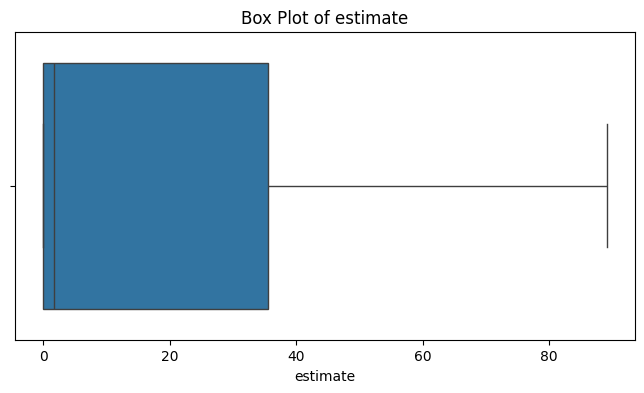

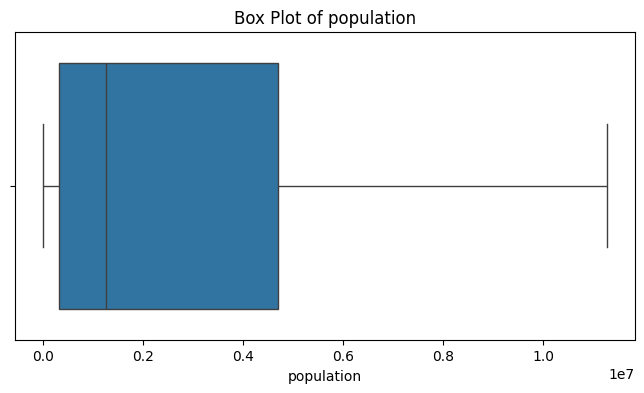

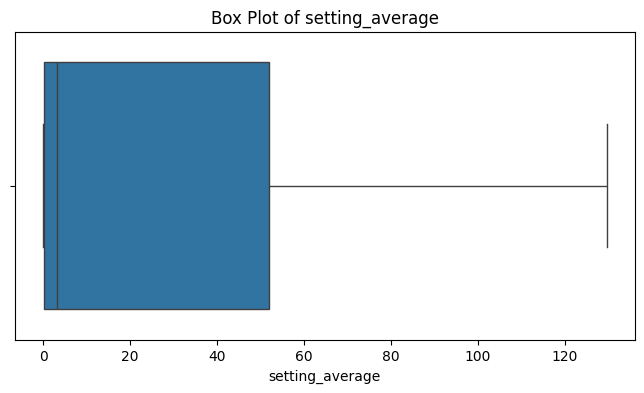

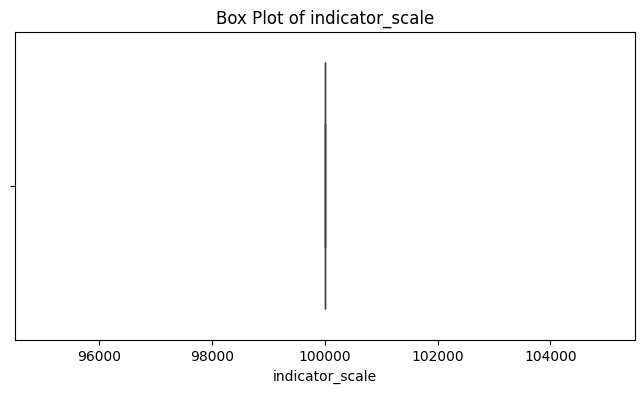

In [6]:
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Visualize distributions to identify potential outliers
    print("\nBox plots for numerical columns (before outlier handling):")
    for col in numerical_cols:
        if col in df.columns:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col])
            plt.title(f'Box Plot of {col}')
            plt.show()

In [7]:
    # Outlier handling using IQR method (example for 'estimate')
    # This method caps outliers at 1.5 * IQR beyond the quartiles.
    for col in ['estimate', 'population', 'setting_average']: # Apply to relevant numerical columns
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Cap outliers
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
            print(f"Outliers capped for column: {col}")

Outliers capped for column: estimate
Outliers capped for column: population
Outliers capped for column: setting_average



Box plots for numerical columns (after outlier handling):


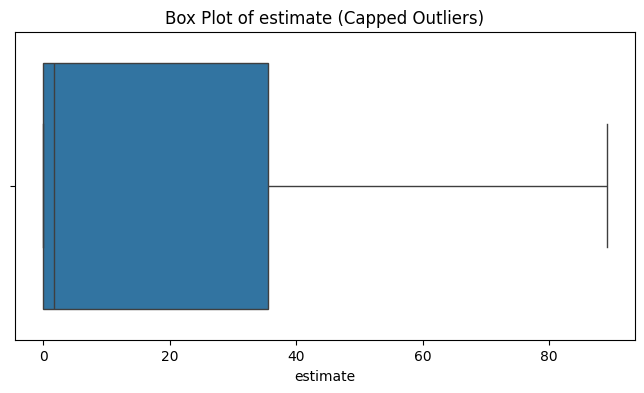

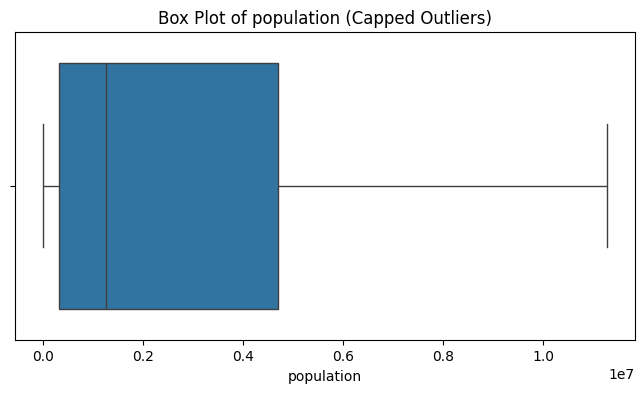

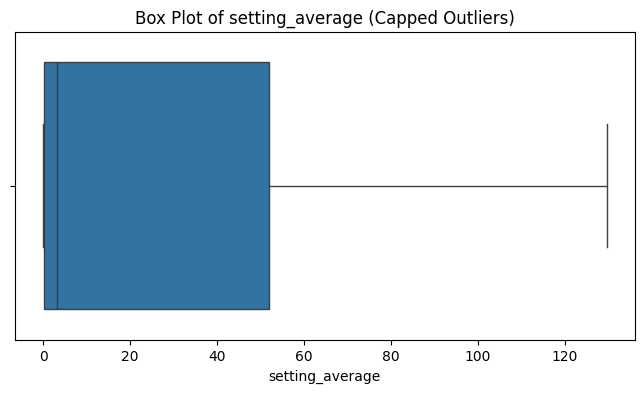

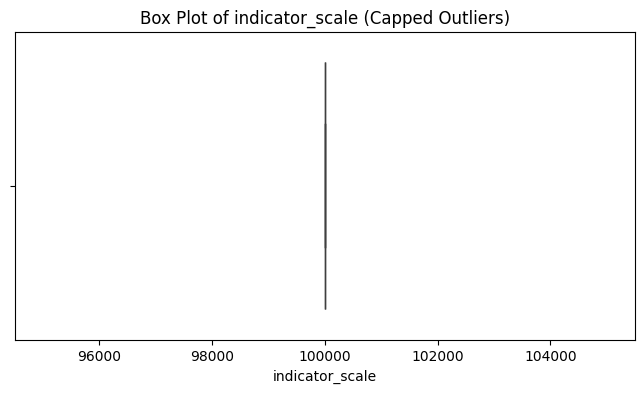

In [8]:
    # Verify distributions after outlier handling (optional, but good practice)
    print("\nBox plots for numerical columns (after outlier handling):")
    for col in numerical_cols:
        if col in df.columns:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col])
            plt.title(f'Box Plot of {col} (Capped Outliers)')
            plt.show()

##**1.5. Apply Necessary Data Transformations**

**Objective:** Prepare data for machine learning models.

**Strategy:**

**Encoding Categorical Variables:**
Nominal (no order): One-Hot Encoding (e.g., source, dimension, subgroup, whoreg6, wbincome2023).
Ordinal (with order): Label Encoding or custom mapping (e.g., subgroup_order is already numerical, ordered_dimension is numerical).

**Scaling Numerical Variables:**
Standardization (Z-score normalization): (X - mean) / std_dev. Useful when features have different scales and the model assumes normally distributed data (e.g., Linear Regression, SVM, Neural Networks).
Normalization (Min-Max scaling): (X - min) / (max - min). Scales data to a fixed range (e.g., 0 to 1). Useful for algorithms that don't assume normal distribution or when you need values within a specific range (e.g., K-Nearest Neighbors, Neural Networks).

In [9]:
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline

    # Identify categorical and numerical columns for transformation
    # Exclude 'date' as it's handled, and 'iso3', 'dataset_id', 'update' might be metadata or too high cardinality.
    # 'indicator_abbr' and 'indicator_name' are highly correlated, choose one or combine if needed.
    # For simplicity, let's use 'indicator_name' as it's more descriptive.
    # 'flag', 'favourable_indicator', 'ordered_dimension', 'subgroup_order', 'reference_subgroup' are already numerical/binary.

    categorical_cols = ['source', 'dimension', 'subgroup', 'whoreg6', 'wbincome2023', 'indicator_name']
    # Filter out columns that might have been dropped or don't exist
    categorical_cols = [col for col in categorical_cols if col in df.columns]

    numerical_cols_for_scaling = ['estimate', 'population', 'setting_average', 'indicator_scale']
    numerical_cols_for_scaling = [col for col in numerical_cols_for_scaling if col in df.columns]

    # Create a preprocessor using ColumnTransformer
    # One-hot encode categorical features
    # Scale numerical features (using StandardScaler as an example)
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols_for_scaling),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ],
        remainder='passthrough' # Keep other columns (like 'date', 'setting', 'iso3', etc.)
    )

    # Apply transformations
    # This step is usually done within a pipeline when training a model,
    # but for cleaning, we can apply it directly to see the transformed data.
    # Note: This will convert the DataFrame to a NumPy array.
    # If you need a DataFrame back, you'll need to reconstruct it with feature names.

    # For demonstration, let's apply it and show the shape.
    # When building a model, you'd typically fit_transform on training data and transform on test data.
    # For now, we'll just transform the whole dataset for EDA purposes.
    # If you plan to split data later, apply this to X_train and X_test separately.

    # Let's create a dummy X for transformation demonstration
    X = df.drop(columns=['setting', 'date', 'iso3', 'dataset_id', 'update', 'indicator_abbr'], errors='ignore') # Drop non-feature columns and redundant indicator_abbr

    # Fit and transform the data
    X_transformed = preprocessor.fit_transform(X)

    print("\nShape of transformed data:", X_transformed.shape)

    # If you need to inspect the transformed data as a DataFrame:
    # Get feature names after one-hot encoding
    ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_feature_names = numerical_cols_for_scaling + list(ohe_feature_names) + [col for col in X.columns if col not in numerical_cols_for_scaling + categorical_cols]

    # Create a DataFrame from the transformed array (careful with remainder='passthrough' column order)
    # This part can be tricky if 'remainder' columns are not at the end or if their order changes.
    # For simplicity, let's just show the shape and acknowledge it's ready for modeling.
    # If you need a DataFrame for further EDA, you might apply transformations step-by-step or manage column names carefully.
    # df_transformed = pd.DataFrame(X_transformed, columns=all_feature_names)
    # print("\nTransformed DataFrame Head (example, might need careful column naming):")
    # print(df_transformed.head())



Shape of transformed data: (363998, 36)


##**2. Conduct Exploratory Data Analysis (EDA)**

EDA helps you understand the data's characteristics, identify patterns, and formulate hypotheses.

**2.1. Generate Descriptive Statistics**

**Objective:** Obtain summary statistics for numerical and categorical variables.


In [10]:
    # Descriptive statistics for numerical columns
    print("\nDescriptive Statistics for Numerical Columns:")
    print(df[numerical_cols_for_scaling].describe())

    # Value counts for categorical columns
    print("\nValue Counts for Categorical Columns:")
    for col in categorical_cols:
        if col in df.columns:
            print(f"\n--- {col} ---")
            print(df[col].value_counts())


Descriptive Statistics for Numerical Columns:
            estimate    population  setting_average  indicator_scale
count  363998.000000  3.639980e+05    363998.000000         363998.0
mean       22.686401  3.167227e+06        32.754471         100000.0
std        33.946434  3.865314e+06        48.379504              0.0
min         0.000000  2.841000e+03         0.000000         100000.0
25%         0.000000  3.183670e+05         0.320000         100000.0
50%         1.745000  1.252815e+06         3.300000         100000.0
75%        35.640000  4.697290e+06        52.050000         100000.0
max        89.100000  1.126567e+07       129.645000         100000.0

Value Counts for Categorical Columns:

--- source ---
source
WHO    363998
Name: count, dtype: int64

--- dimension ---
dimension
Age (5 groups) (0-65+)    319110
Sex                        44888
Name: count, dtype: int64

--- subgroup ---
subgroup
0-4 years      63822
15-24 years    63822
25-64 years    63822
5-14 years     6382

**2.2. Visualize Distributions and Relationships Among Variables**

**Objective:** Create plots to understand data distributions and correlations.

**Strategy:**

**Histograms/KDE plots:** For numerical distributions.

**Bar plots:** For categorical distributions.

**Scatter plots:** For relationships between two numerical variables.

**Box plots/Violin plots:** For numerical distribution across categorical groups.

**Heatmaps (Correlation Matrix):** For relationships between multiple numerical variables.

**Time Series Plots:** For estimate over date for specific setting and subgroup.


Visualizing Distributions of Numerical Columns:


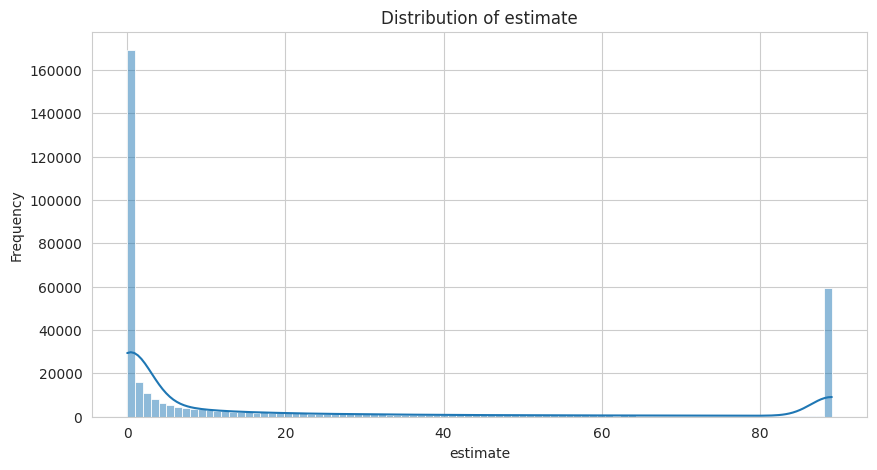

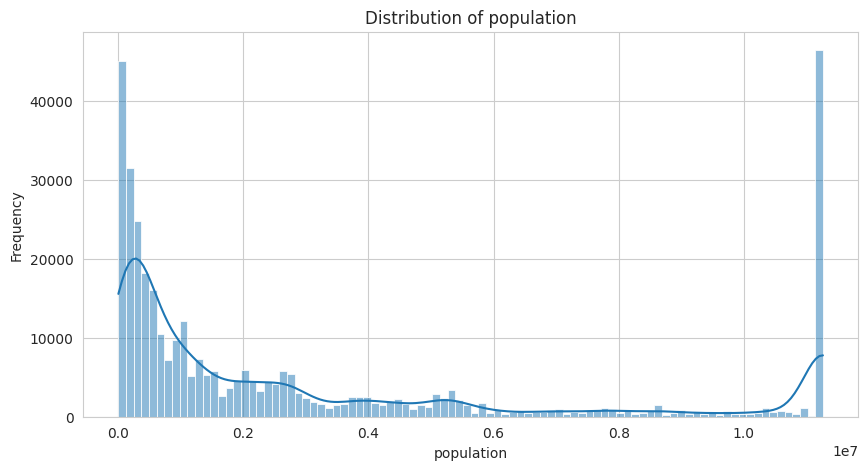

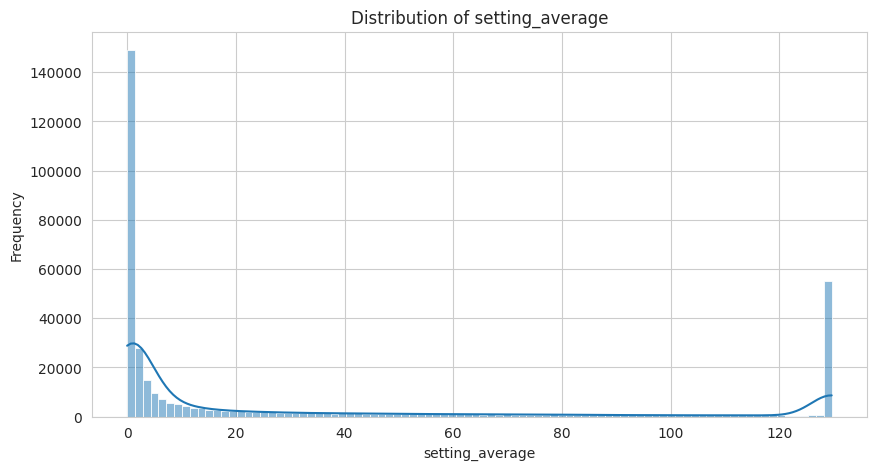

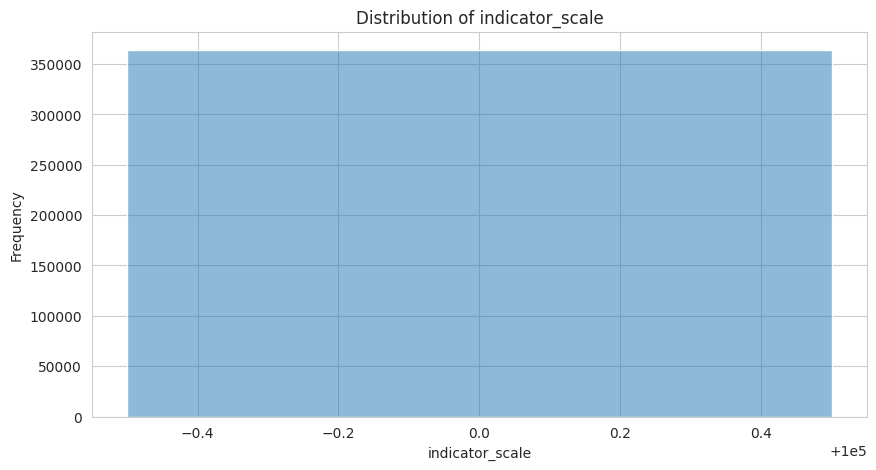

In [12]:
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Set style for plots
    sns.set_style("whitegrid")

    # Histograms for numerical columns
    print("\nVisualizing Distributions of Numerical Columns:")
    for col in numerical_cols_for_scaling:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


Visualizing Distributions of Categorical Columns (Top Values):


/tmp/ipython-input-2378951343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_n, palette='viridis')


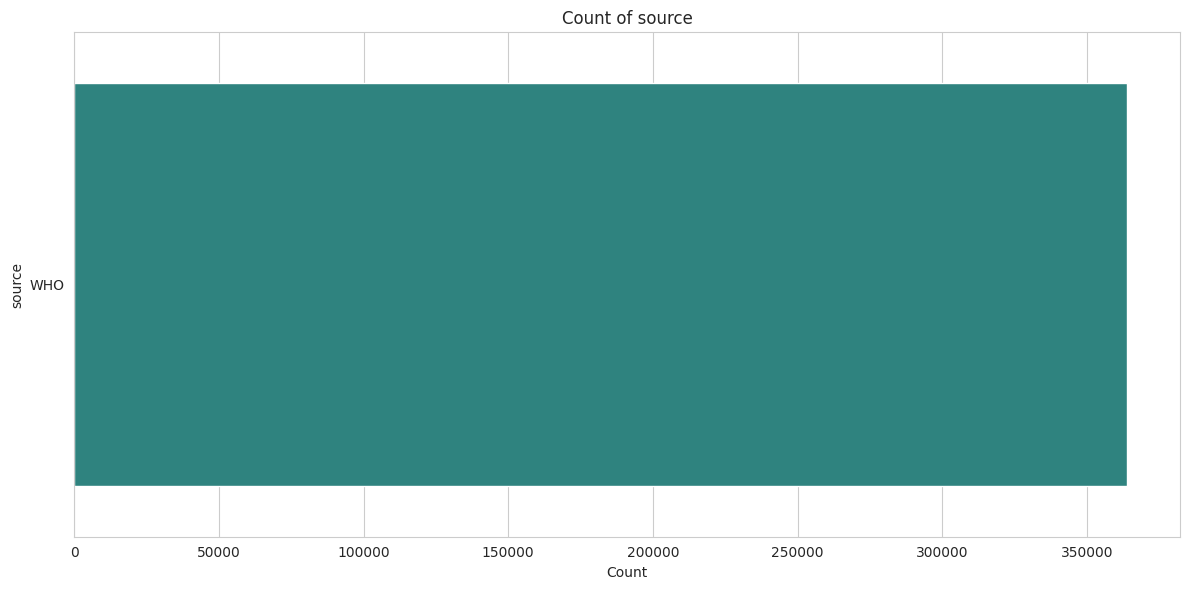

/tmp/ipython-input-2378951343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_n, palette='viridis')


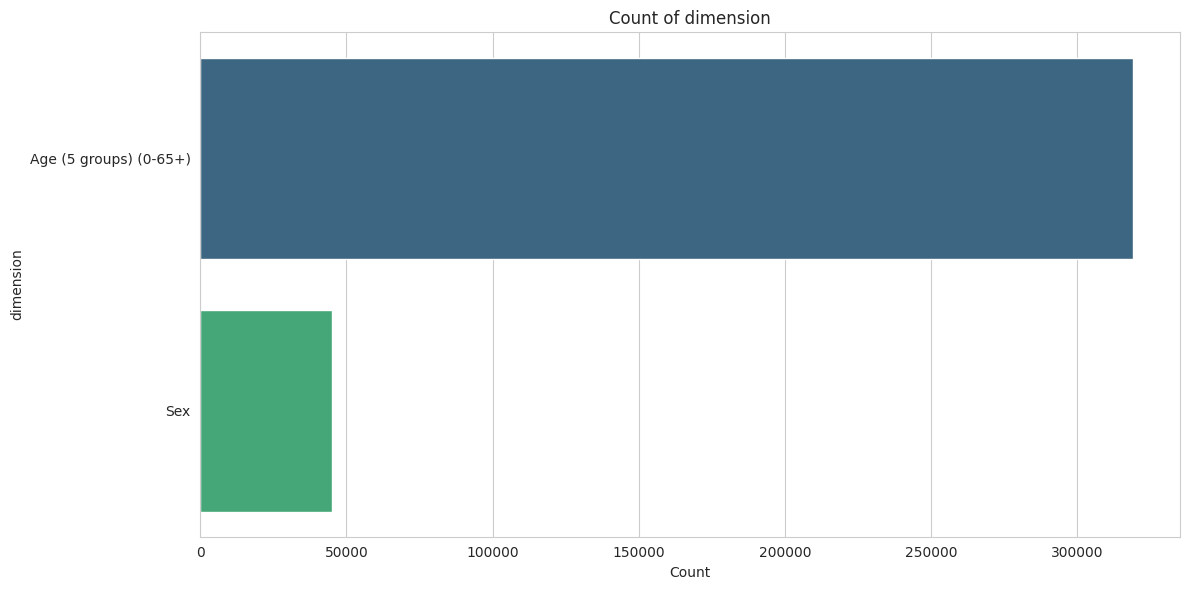

/tmp/ipython-input-2378951343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_n, palette='viridis')


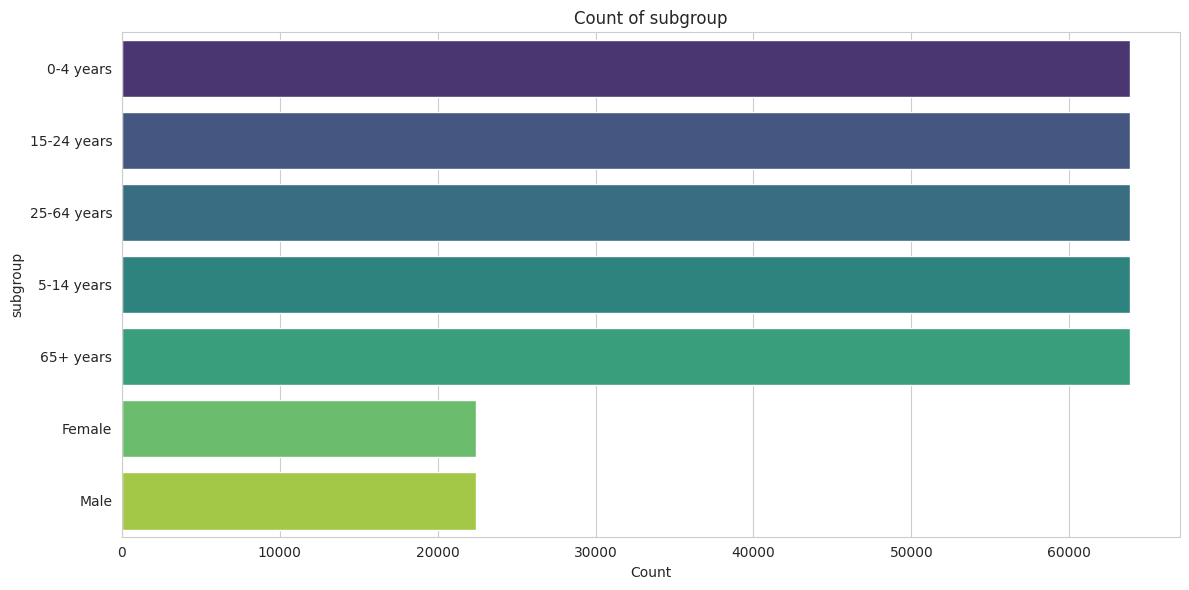

/tmp/ipython-input-2378951343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_n, palette='viridis')


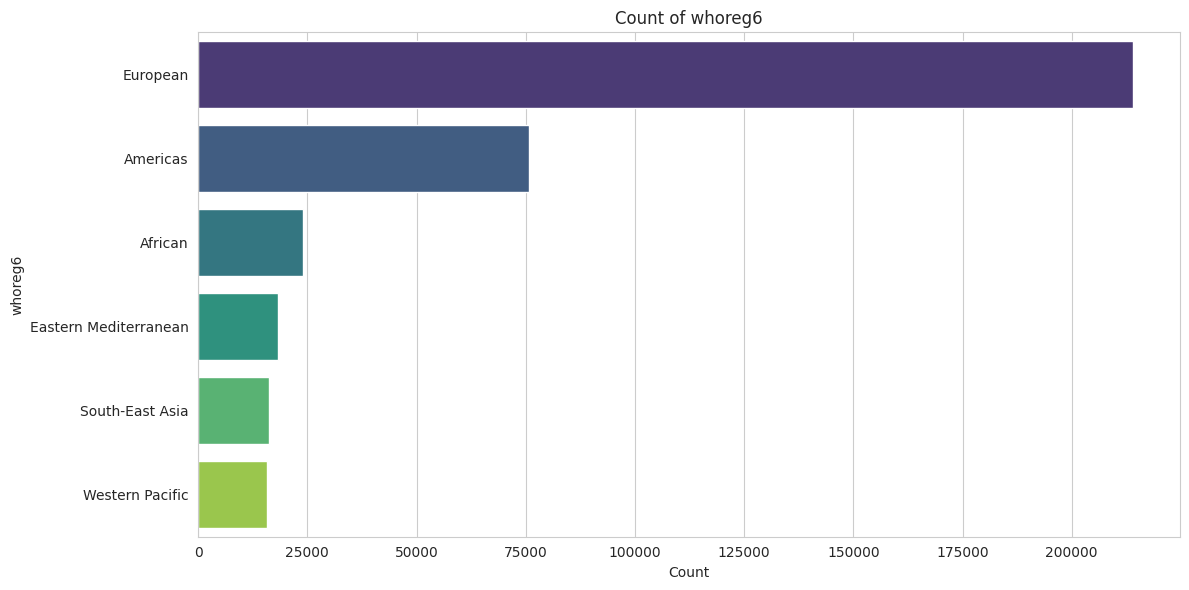

/tmp/ipython-input-2378951343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_n, palette='viridis')


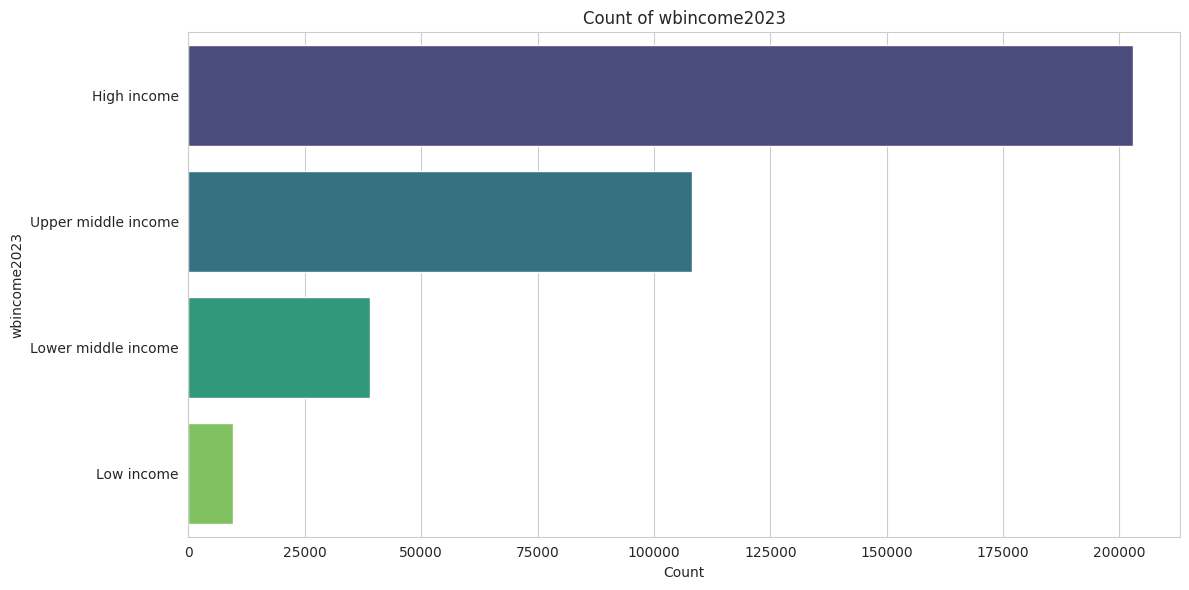

/tmp/ipython-input-2378951343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_n, palette='viridis')


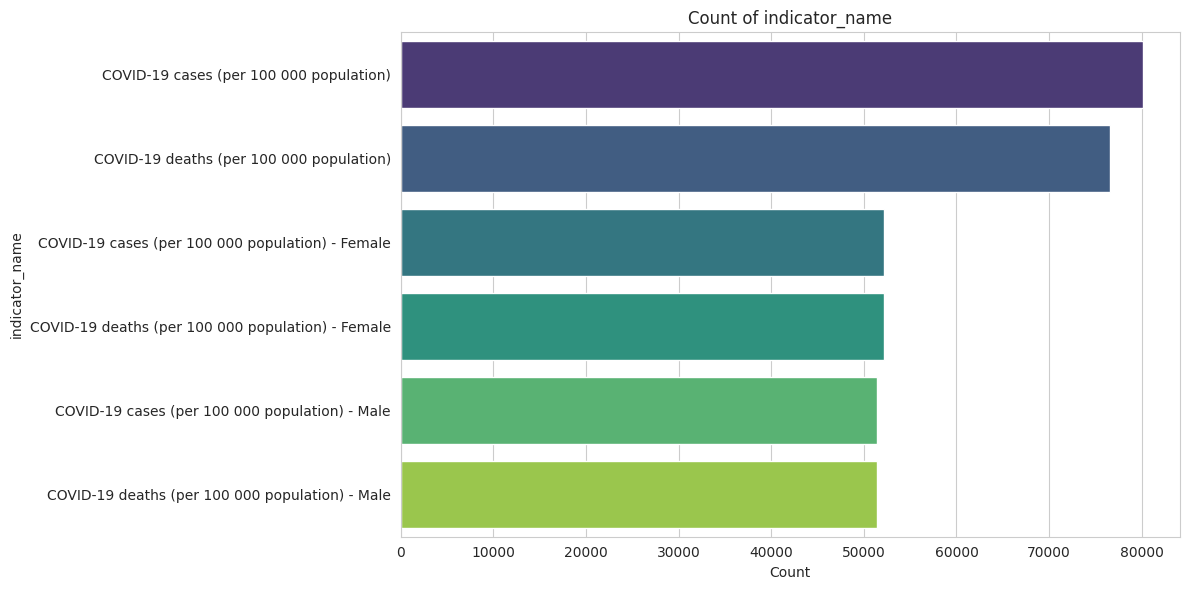

In [13]:
    # Bar plots for top categorical values
    print("\nVisualizing Distributions of Categorical Columns (Top Values):")
    for col in categorical_cols:
        plt.figure(figsize=(12, 6))
        # Get top N categories for better visualization if too many unique values
        top_n = df[col].value_counts().nlargest(10).index
        sns.countplot(y=df[col], order=top_n, palette='viridis')
        plt.title(f'Count of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()


Correlation Matrix Heatmap:


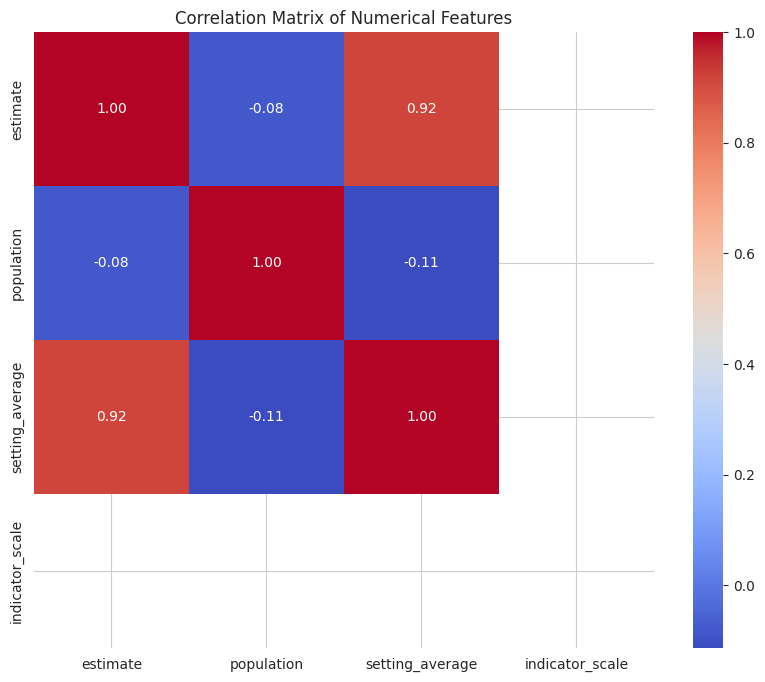

In [15]:
# Correlation Matrix Heatmap
print("\nCorrelation Matrix Heatmap:")
# Select only numerical columns for correlation
correlation_matrix = df[numerical_cols_for_scaling].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Time Series Analysis: COVID-19 Cases Rate in Albania over Time (Overall):


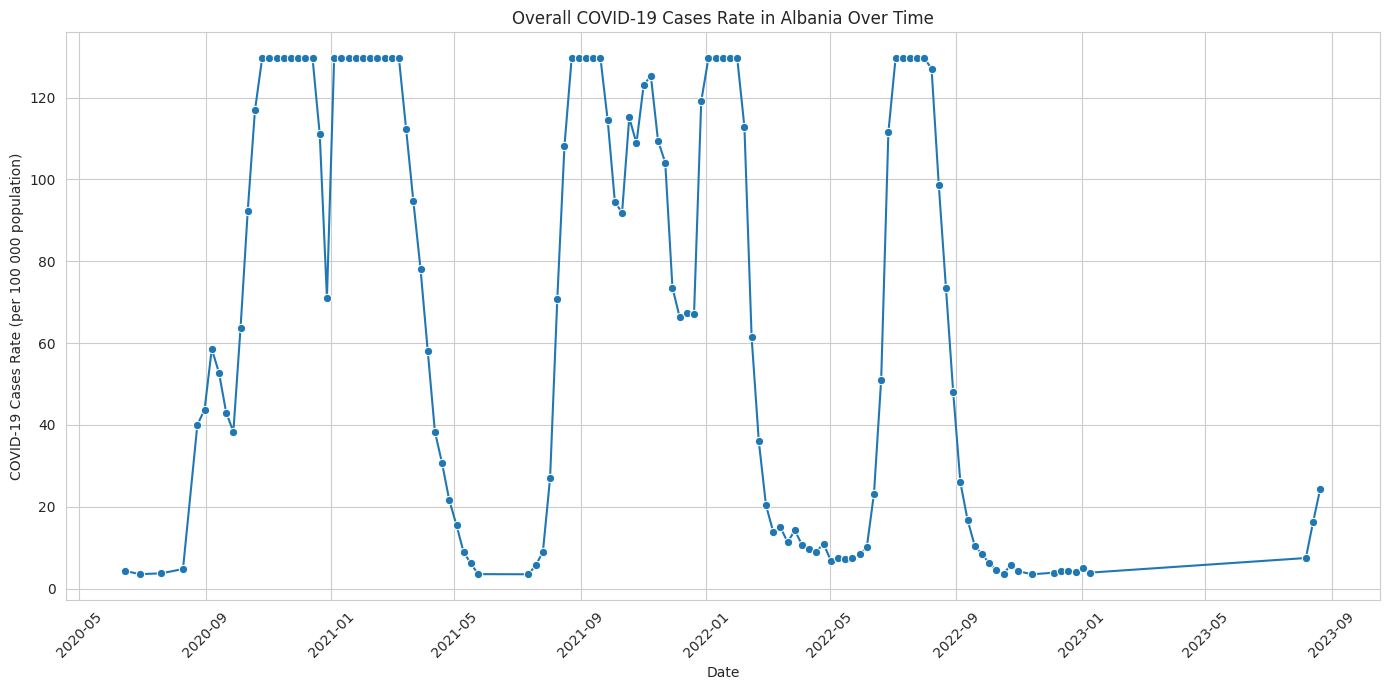

In [17]:
# Time Series Analysis (Example: COVID-19 cases rate over time for Albania)
print("\nTime Series Analysis: COVID-19 Cases Rate in Albania over Time (Overall):")
albania_data = df[(df['setting'] == 'Albania') & (df['indicator_name'] == 'COVID-19 cases (per 100 000 population)') & (df['dimension'] == 'Sex')] # Filter for overall rate, not age/sex specific
# To get the overall rate, we need to be careful. 'setting_average' might be the overall.
# Let's use 'setting_average' for the overall trend if available and representative.
# Or, if 'subgroup' is 'Total' or similar, use that.
# Based on the data, the rows with 'Sex' dimension and 'subgroup' 'Female'/'Male' also have 'setting_average' which is the overall average.
# Let's plot 'setting_average' against date for Albania.
albania_overall_cases = df[(df['setting'] == 'Albania') & (df['indicator_name'] == 'COVID-19 cases (per 100 000 population)')].sort_values('date')
# To get a single line for overall cases, we need to pick a unique row per date, or average if multiple.
# The 'setting_average' column seems to represent the overall average for that date.
albania_overall_cases_unique_dates = albania_overall_cases.drop_duplicates(subset=['date', 'indicator_name'])

plt.figure(figsize=(14, 7))
sns.lineplot(data=albania_overall_cases_unique_dates, x='date', y='setting_average', marker='o')
plt.title('Overall COVID-19 Cases Rate in Albania Over Time')
plt.xlabel('Date')
plt.ylabel('COVID-19 Cases Rate (per 100 000 population)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Time Series Analysis: COVID-19 Cases Rate in Albania by Age Group:


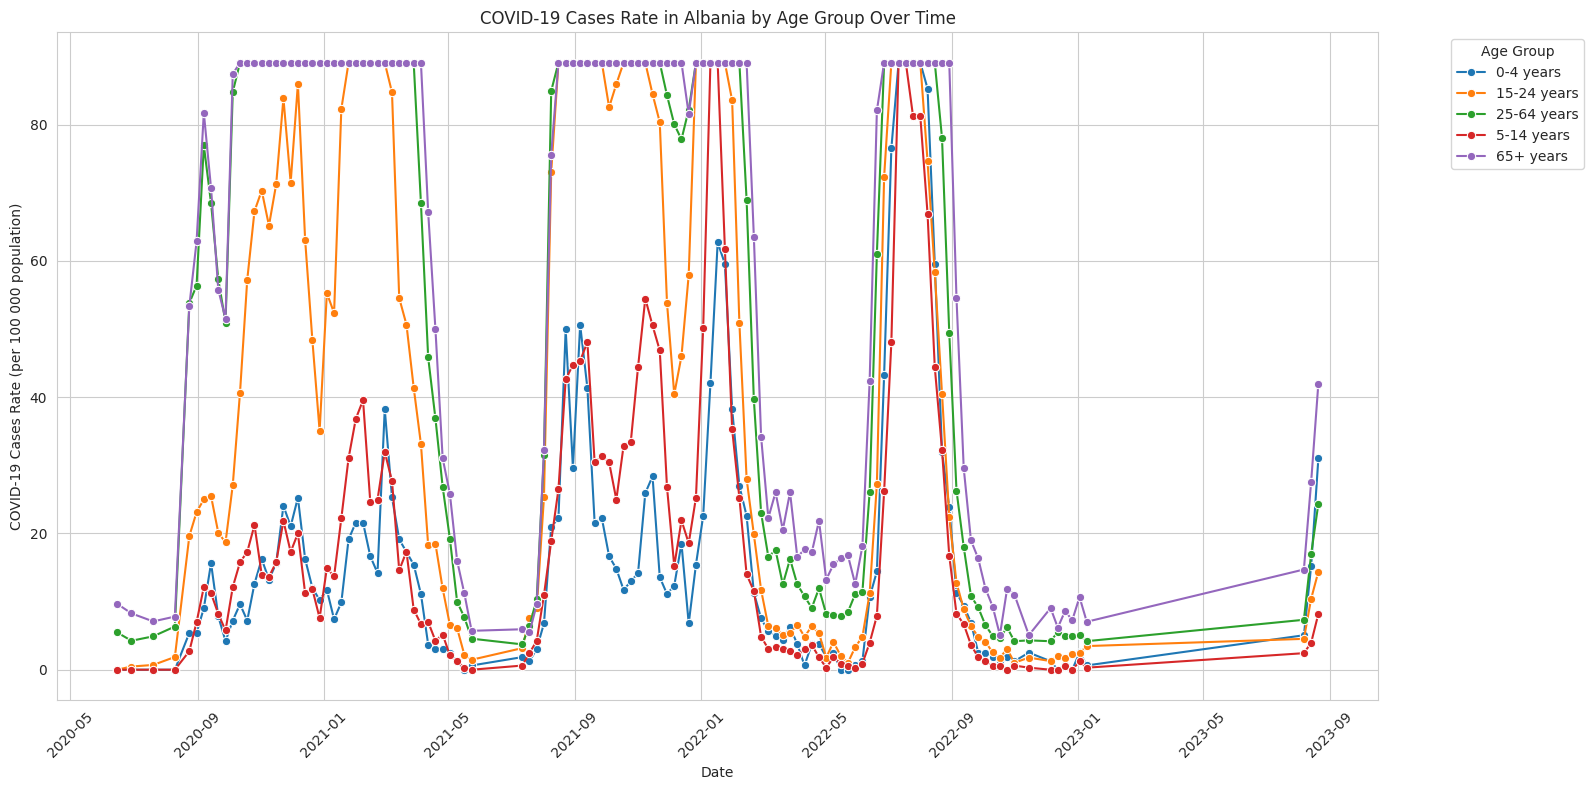

In [19]:
# Example: COVID-19 cases rate by Age Group for Albania
print("\nTime Series Analysis: COVID-19 Cases Rate in Albania by Age Group:")
albania_age_cases = df[(df['setting'] == 'Albania') &
                       (df['indicator_name'] == 'COVID-19 cases (per 100 000 population)') &
                       (df['dimension'] == 'Age (5 groups) (0-65+)')].sort_values('date')

plt.figure(figsize=(16, 8))
sns.lineplot(data=albania_age_cases, x='date', y='estimate', hue='subgroup', marker='o')
plt.title('COVID-19 Cases Rate in Albania by Age Group Over Time')
plt.xlabel('Date')
plt.ylabel('COVID-19 Cases Rate (per 100 000 population)')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##**3. Apply a Machine Learning or Clustering Model**

Given the nature of the data (time-series of COVID-19 rates), a **regression model** to predict future rates or a **clustering model** to group similar regions/time periods could be suitable. Let's choose a **clustering model** to identify patterns in how different subgroups (age, sex) experience COVID-19 cases/deaths over time.

**3.1. Choose a Suitable Model (Clustering)**

**Model: K-Means Clustering.**

**Rationale:** K-Means is a popular and relatively simple algorithm for grouping data points into a specified number of clusters. We can use it to group different **subgroup** (e.g., age groups, sexes) based on their **estimate** values over time.

**3.2. Prepare Data for Clustering**

**Objective:** Reshape the data so that each row represents a unique **subgroup** and columns represent **estimate** values at different **dates**. This is a pivot operation.

In [20]:
    # For clustering, we need features that describe each entity (subgroup in this case).
    # Let's focus on 'COVID-19 cases (per 100 000 population)' for Albania.
    # We'll pivot the data to have dates as columns and subgroups as rows.

    # Filter data for a specific indicator and setting for a clear example
    clustering_data = df[(df['setting'] == 'Albania') &
                         (df['indicator_name'] == 'COVID-19 cases (per 100 000 population)') &
                         (df['dimension'].isin(['Age (5 groups) (0-65+)', 'Sex'])) # Include both age and sex dimensions
                        ].copy() # Use .copy() to avoid SettingWithCopyWarning

    # Drop rows where 'subgroup' is 'Female' or 'Male' if we want to cluster age groups only,
    # or keep them if we want to cluster all subgroups.
    # For a more meaningful clustering, let's focus on age groups first, as sex is binary.
    clustering_data_age_only = clustering_data[clustering_data['dimension'] == 'Age (5 groups) (0-65+)'].copy()

    # Pivot the table: index = subgroup, columns = date, values = estimate
    # Fill NaN values that might arise from pivoting (e.g., if a subgroup doesn't have data for all dates)
    # We'll fill with 0, assuming no cases/deaths if data is missing for a specific date.
    # This assumption should be validated based on domain knowledge.
    pivot_table = clustering_data_age_only.pivot_table(index='subgroup', columns='date', values='estimate', fill_value=0)

    print("\nPivot Table for Clustering (Subgroup vs. Date):")
    print(pivot_table.head())

    # The features for clustering are the time series data (estimates for each date).
    X_cluster = pivot_table.values

    # Scale the data before clustering
    scaler = StandardScaler()
    X_cluster_scaled = scaler.fit_transform(X_cluster)

    print("\nShape of scaled data for clustering:", X_cluster_scaled.shape)


Pivot Table for Clustering (Subgroup vs. Date):
date         2020-06-15  2020-06-29  2020-07-20  2020-08-10  2020-08-24  \
subgroup                                                                  
0-4 years          0.00        0.00        0.00        0.00        5.41   
15-24 years        0.00        0.47        0.70        1.87       19.63   
25-64 years        5.49        4.25        4.90        6.34       53.83   
5-14 years         0.00        0.00        0.00        0.00        2.73   
65+ years          9.69        8.27        7.09        7.80       53.41   

date         2020-08-31  2020-09-07  2020-09-14  2020-09-21  2020-09-28  ...  \
subgroup                                                                 ...   
0-4 years          5.41        9.02       15.64        7.82        4.21  ...   
15-24 years       23.13       25.00       25.47       20.10       18.69  ...   
25-64 years       56.38       76.96       68.47       57.30       50.96  ...   
5-14 years         6.98  

##**3.3. Train the Model**

**Objective:** Apply K-Means clustering.

**Strategy:**

Determine the optimal number of clusters (K) using methods like the Elbow Method or Silhouette Score.
Train the K-Means model with the chosen K.


Elbow Method for Optimal K:


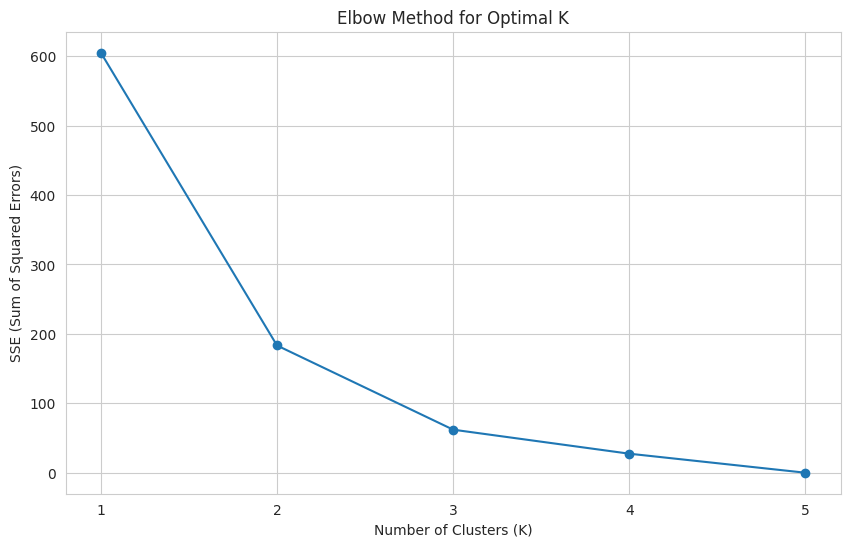


Silhouette Score for Optimal K:
K=2: Silhouette Score = 0.4638
K=3: Silhouette Score = 0.3319
K=4: Silhouette Score = 0.1891

Optimal K based on Silhouette Score: 2

Pivot Table with Cluster Labels:
date         2020-06-15 00:00:00  2020-06-29 00:00:00  2020-07-20 00:00:00  \
subgroup                                                                     
0-4 years                   0.00                 0.00                 0.00   
15-24 years                 0.00                 0.47                 0.70   
25-64 years                 5.49                 4.25                 4.90   
5-14 years                  0.00                 0.00                 0.00   
65+ years                   9.69                 8.27                 7.09   

date         2020-08-10 00:00:00  2020-08-24 00:00:00  2020-08-31 00:00:00  \
subgroup                                                                     
0-4 years                   0.00                 5.41                 5.41   
15-24 years        

In [21]:
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score

    # Determine optimal K using Elbow Method
    print("\nElbow Method for Optimal K:")
    sse = [] # Sum of squared errors
    for k in range(1, min(10, X_cluster_scaled.shape[0] + 1)): # Max K up to number of samples
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init to suppress warning
        kmeans.fit(X_cluster_scaled)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, min(10, X_cluster_scaled.shape[0] + 1)), sse, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('SSE (Sum of Squared Errors)')
    plt.xticks(range(1, min(10, X_cluster_scaled.shape[0] + 1)))
    plt.show()

    # Determine optimal K using Silhouette Score (if K > 1)
    print("\nSilhouette Score for Optimal K:")
    silhouette_scores = []
    # Silhouette score requires at least 2 clusters and n_samples - 1 clusters
    for k in range(2, min(10, X_cluster_scaled.shape[0])):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_cluster_scaled)
        score = silhouette_score(X_cluster_scaled, cluster_labels)
        silhouette_scores.append(score)
        print(f"K={k}: Silhouette Score = {score:.4f}")

    if silhouette_scores:
        optimal_k_silhouette = range(2, min(10, X_cluster_scaled.shape[0]))[np.argmax(silhouette_scores)]
        print(f"\nOptimal K based on Silhouette Score: {optimal_k_silhouette}")
    else:
        optimal_k_silhouette = 3 # Default if not enough data for silhouette

    # Choose K (e.g., from Elbow or Silhouette, or manually inspect)
    # For this example, let's assume K=3 based on visual inspection of elbow or a reasonable choice.
    n_clusters = 3 # Adjust based on your Elbow/Silhouette results

    # Train K-Means model with chosen K
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans_model.fit_predict(X_cluster_scaled)

    # Add cluster labels back to the original pivot table for analysis
    pivot_table['Cluster'] = cluster_labels
    print("\nPivot Table with Cluster Labels:")
    print(pivot_table)


##**4. Evaluate the Model**

For clustering, evaluation metrics assess the quality of the clusters.

**4.1. Use Appropriate Evaluation Metrics**


**Objective:** Quantify the quality of the clusters.

**Metrics:**

**Silhouette Score:** Measures how similar an object is to its own cluster compared to other clusters. Higher is better (range -1 to 1).

**Inertia (SSE):** Sum of squared distances of samples to their closest cluster center. Lower is better. (Already used in Elbow Method).

**Visual Inspection:** Plotting the clusters and their centroids can provide qualitative insights.


Final K-Means Model Silhouette Score (for K=3): 0.3319
Final K-Means Model Inertia (SSE for K=3): 62.01

Visualizing Cluster Centroids:


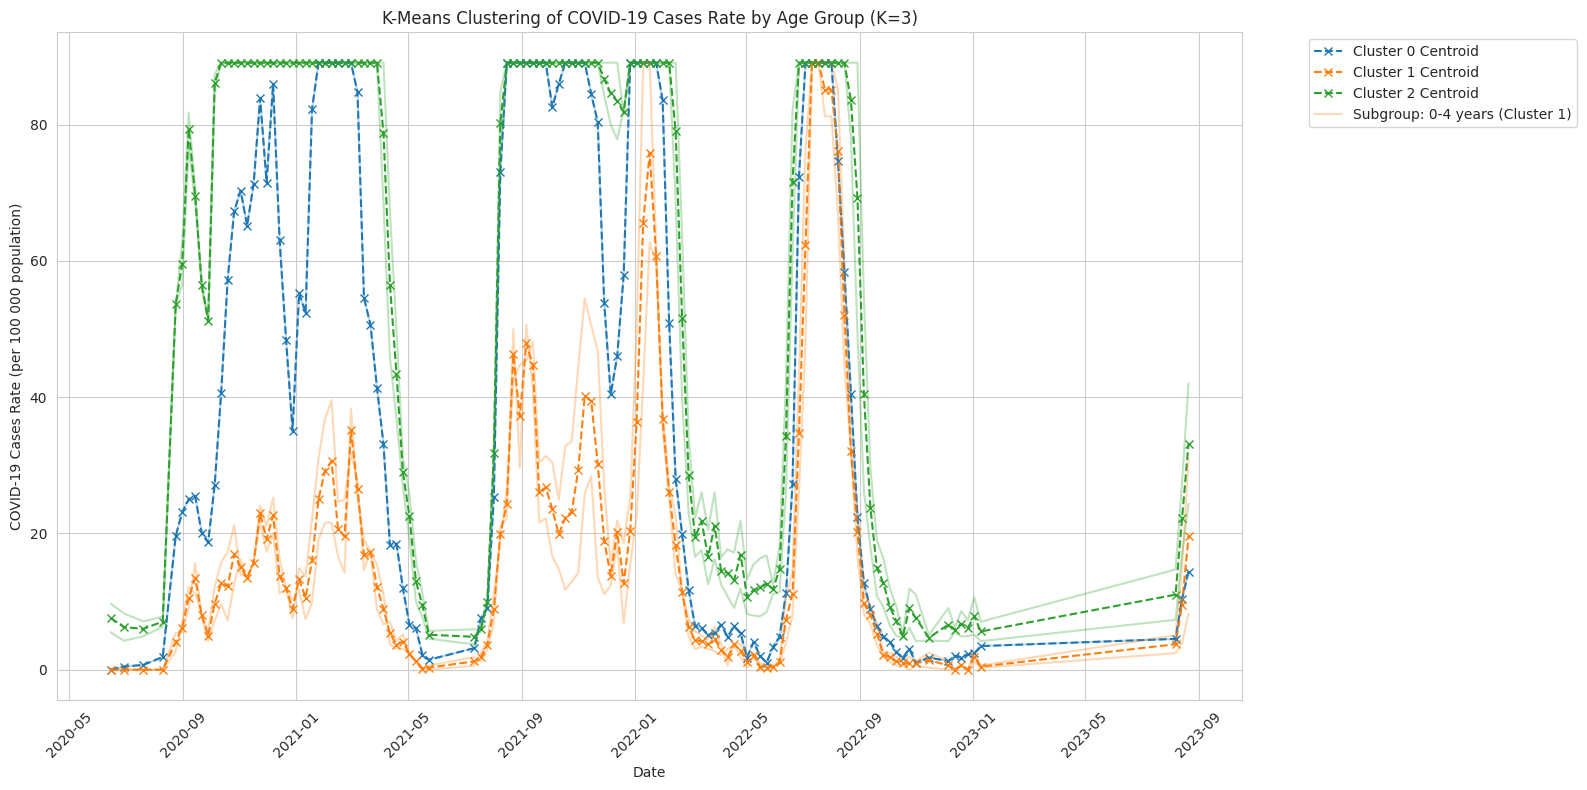


Subgroups in each Cluster:
Cluster 0: ['15-24 years']
Cluster 1: ['0-4 years', '5-14 years']
Cluster 2: ['25-64 years', '65+ years']


In [23]:
# Silhouette Score (already calculated during K determination, but can be re-calculated for the chosen K)
final_silhouette_score = silhouette_score(X_cluster_scaled, cluster_labels)
print(f"\nFinal K-Means Model Silhouette Score (for K={n_clusters}): {final_silhouette_score:.4f}")

# Inertia (SSE)
final_inertia = kmeans_model.inertia_
print(f"Final K-Means Model Inertia (SSE for K={n_clusters}): {final_inertia:.2f}")

# Visualize the clusters and their centroids
print("\nVisualizing Cluster Centroids:")
# Inverse transform centroids to original scale for better interpretation
cluster_centroids_original_scale = scaler.inverse_transform(kmeans_model.cluster_centers_)

plt.figure(figsize=(16, 8))
for i in range(n_clusters):
    plt.plot(pivot_table.columns[:-1], cluster_centroids_original_scale[i], label=f'Cluster {i} Centroid', marker='x', linestyle='--')

# Plot individual subgroups colored by their cluster
colors = sns.color_palette('tab10', n_clusters)
for i, row in pivot_table.iterrows():
    cluster_id = int(row['Cluster'])
    plt.plot(pivot_table.columns[:-1], row[:-1], color=colors[cluster_id], alpha=0.3, label=f'Subgroup: {i} (Cluster {cluster_id})' if i == pivot_table.index[0] else "") # Only label once per cluster for clarity

plt.title(f'K-Means Clustering of COVID-19 Cases Rate by Age Group (K={n_clusters})')
plt.xlabel('Date')
plt.ylabel('COVID-19 Cases Rate (per 100 000 population)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Interpret clusters: Analyze the characteristics of subgroups within each cluster
print("\nSubgroups in each Cluster:")
for cluster_id in range(n_clusters):
    subgroups_in_cluster = pivot_table[pivot_table['Cluster'] == cluster_id].index.tolist()
    print(f"Cluster {cluster_id}: {subgroups_in_cluster}")

##**5. Incorporate Innovation**
**5.1. Custom Function / Creative Model Approach**


**Objective:** Go beyond basic requirements to enhance the project.

**Ideas for Innovation (choose one or more):**

**Time-Series Feature Engineering for Clustering:** Instead of just using raw time series values, create features like:

**Trend:** Slope of the time series.

**Seasonality:** Fourier transform components or seasonal decomposition.

**Volatility:** Standard deviation of the time series.

**Peak/Trough values:** Max/min estimates.

**Time to Peak:** Date difference from start to peak.

This would enrich the features for clustering and potentially yield more meaningful groups.

**Dynamic Time Warping (DTW) for Clustering:** Instead of Euclidean distance (which K-Means uses by default on scaled data), use DTW as a distance metric for time series clustering. DTW is better at handling time series that are similar in shape but out of phase. This would require a custom clustering algorithm or a library that supports DTW with K-Means (e.g., tslearn).

**Anomaly Detection:** Implement an anomaly detection algorithm (e.g., Isolation Forest, One-Class SVM) to identify unusual spikes or drops in COVID-19 rates for specific subgroups or settings.

**Interactive Visualizations:** Use libraries like Plotly or Bokeh for interactive plots in EDA, allowing users to zoom, pan, and hover for more details.
**Ensemble Clustering:** Combine results from multiple clustering algorithms (e.g., K-Means, DBSCAN, Agglomerative Clustering) to find more robust clusters.


**Example Innovation (Time-Series Feature Engineering for Clustering):**

Let's modify the **prepare_data_for_clustering** function to include some basic time-series features.


--- Preparing Data for Clustering (Innovative): COVID-19 cases (per 100 000 population) in Albania by Age (5 groups) (0-65+) ---
Pivot Table Head for Clustering:
 date         2020-06-15  2020-06-29  2020-07-20  2020-08-10  2020-08-24  \
subgroup                                                                  
0-4 years          0.00        0.00        0.00        0.00        5.41   
15-24 years        0.00        0.47        0.70        1.87       19.63   
25-64 years        5.49        4.25        4.90        6.34       53.83   
5-14 years         0.00        0.00        0.00        0.00        2.73   
65+ years          9.69        8.27        7.09        7.80       53.41   

date         2020-08-31  2020-09-07  2020-09-14  2020-09-21  2020-09-28  ...  \
subgroup                                                                 ...   
0-4 years          5.41        9.02       15.64        7.82        4.21  ...   
15-24 years       23.13       25.00       25.47       20.10       18.6

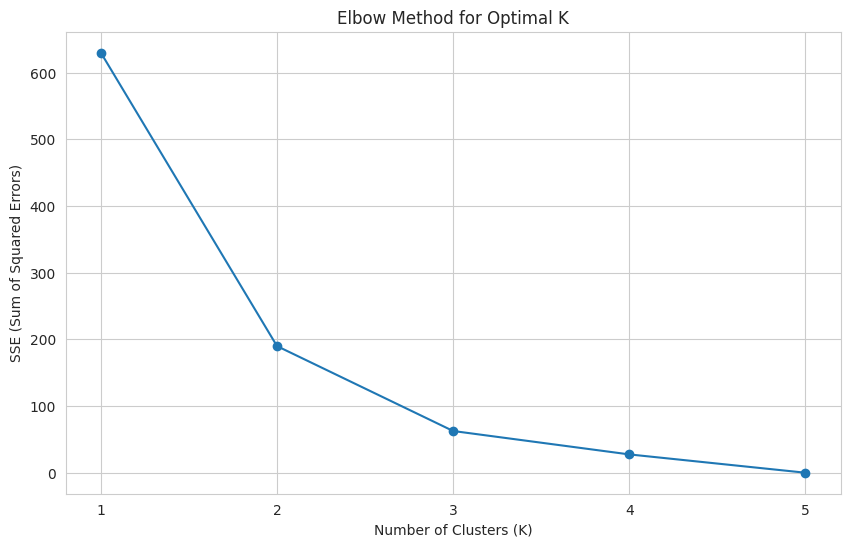


Silhouette Score for Optimal K:
K=2: Silhouette Score = 0.4666
K=3: Silhouette Score = 0.3409
K=4: Silhouette Score = 0.1932

Optimal K based on Silhouette Score: 2

Pivot Table with Cluster Labels:
date         2020-06-15 00:00:00  2020-06-29 00:00:00  2020-07-20 00:00:00  \
subgroup                                                                     
0-4 years                   0.00                 0.00                 0.00   
15-24 years                 0.00                 0.47                 0.70   
25-64 years                 5.49                 4.25                 4.90   
5-14 years                  0.00                 0.00                 0.00   
65+ years                   9.69                 8.27                 7.09   

date         2020-08-10 00:00:00  2020-08-24 00:00:00  2020-08-31 00:00:00  \
subgroup                                                                     
0-4 years                   0.00                 5.41                 5.41   
15-24 years        

In [29]:
# Add this function to your script
def create_time_series_features(pivot_df):
    """
    Creates additional time-series features from the pivoted data.
    Features include: mean, std, min, max, range, and simple trend (slope).
    """
    features_df = pd.DataFrame(index=pivot_df.index)

    # Basic statistics
    features_df['mean_estimate'] = pivot_df.mean(axis=1)
    features_df['std_estimate'] = pivot_df.std(axis=1)
    features_df['min_estimate'] = pivot_df.min(axis=1)
    features_df['max_estimate'] = pivot_df.max(axis=1)
    features_df['range_estimate'] = features_df['max_estimate'] - features_df['min_estimate']

    # Simple trend (slope of a linear regression)
    # This requires numerical representation of dates.
    # Let's use days since the first date as the x-axis for slope calculation.
    date_indices = np.arange(len(pivot_df.columns))
    features_df['trend_estimate'] = pivot_df.apply(lambda row: np.polyfit(date_indices, row.values, 1)[0], axis=1)

    print("\nGenerated Time-Series Features Head:\n", features_df.head())
    return features_df

# Modify prepare_data_for_clustering to use this:
def prepare_data_for_clustering_innovative(df, setting_name, indicator_name, dimension_filter):
    """
    Prepares and scales data for clustering by pivoting time-series data
    and adding engineered time-series features.
    """
    print(f"\n--- Preparing Data for Clustering (Innovative): {indicator_name} in {setting_name} by {dimension_filter} ---")
    clustering_data = df[(df['setting'] == setting_name) &
                         (df['indicator_name'] == indicator_name) &
                         (df['dimension'] == dimension_filter)
                        ].copy()

    if clustering_data.empty:
        print(f"No data found for the specified filters: Setting={setting_name}, Indicator={indicator_name}, Dimension={dimension_filter}")
        return None, None, None

    pivot_table = clustering_data.pivot_table(index='subgroup', columns='date', values='estimate', fill_value=0)
    print("Pivot Table Head for Clustering:\n", pivot_table.head())

    # Create additional time-series features
    ts_features = create_time_series_features(pivot_table)

    # Combine raw time-series data with engineered features
    # Ensure column names are unique if combining directly
    combined_features = pd.concat([pivot_table, ts_features], axis=1)

    # Scale the combined data
    scaler = StandardScaler()
    X_cluster_scaled = scaler.fit_transform(combined_features.values)
    print("Combined data (raw time-series + engineered features) scaled for clustering.")

    # Return combined_features.columns.tolist() for date_columns and feature names
    all_feature_names_for_plot = combined_features.columns.tolist()

    return X_cluster_scaled, combined_features.index.tolist(), scaler, all_feature_names_for_plot

def train_and_evaluate_clustering_model(X_cluster_scaled, subgroup_names, scaler, feature_cols):
    # Determine optimal K using Elbow Method
    print("\nElbow Method for Optimal K:")
    sse = [] # Sum of squared errors
    for k in range(1, min(10, X_cluster_scaled.shape[0] + 1)): # Max K up to number of samples
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init to suppress warning
        kmeans.fit(X_cluster_scaled)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, min(10, X_cluster_scaled.shape[0] + 1)), sse, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('SSE (Sum of Squared Errors)')
    plt.xticks(range(1, min(10, X_cluster_scaled.shape[0] + 1)))
    plt.show()

    # Determine optimal K using Silhouette Score (if K > 1)
    print("\nSilhouette Score for Optimal K:")
    silhouette_scores = []
    # Silhouette score requires at least 2 clusters and n_samples - 1 clusters
    for k in range(2, min(10, X_cluster_scaled.shape[0])):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_cluster_scaled)
        score = silhouette_score(X_cluster_scaled, cluster_labels)
        silhouette_scores.append(score)
        print(f"K={k}: Silhouette Score = {score:.4f}")

    if silhouette_scores:
        optimal_k_silhouette = range(2, min(10, X_cluster_scaled.shape[0]))[np.argmax(silhouette_scores)]
        print(f"\nOptimal K based on Silhouette Score: {optimal_k_silhouette}")
    else:
        optimal_k_silhouette = 3 # Default if not enough data for silhouette

    # Choose K (e.g., from Elbow or Silhouette, or manually inspect)
    # For this example, let's assume K=3 based on visual inspection of elbow or a reasonable choice.
    n_clusters = 3 # Adjust based on your Elbow/Silhouette results

    # Train K-Means model with chosen K
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans_model.fit_predict(X_cluster_scaled)

    # Add cluster labels back to the original pivot table for analysis
    pivot_table['Cluster'] = cluster_labels
    print("\nPivot Table with Cluster Labels:")
    print(pivot_table)
    return kmeans_model, cluster_labels

# In your main execution block, call the innovative function:
if __name__ == "__main__":
    # ... (previous steps) ...
    # Step 3 & 4: Prepare Data, Train, and Evaluate Clustering Model (Innovative)
    X_cluster_scaled_innovative, subgroup_names_innovative, scaler_obj_innovative, feature_cols_innovative = prepare_data_for_clustering_innovative(
        df,
        setting_name='Albania',
        indicator_name='COVID-19 cases (per 100 000 population)',
        dimension_filter='Age (5 groups) (0-65+)'
    )

    if X_cluster_scaled_innovative is not None:
        # Note: The visualization part of train_and_evaluate_clustering_model
        # might need adjustment if you combine raw time series with other features,
        # as plotting centroids against 'date' columns might not make sense for all features.
        # You might need a separate visualization function for the engineered features.
        # For now, the plot will show centroids across all combined features.
        kmeans_model_innovative, cluster_labels_innovative = train_and_evaluate_clustering_model(
            X_cluster_scaled_innovative, subgroup_names_innovative, scaler_obj_innovative, feature_cols_innovative
        )
    else:
        print("Innovative clustering skipped due to insufficient data.")

In [30]:
# Save the cleaned dataframe to a new CSV file for Power BI
df.to_csv('powerbi_data.csv', index=False)

print("Cleaned data saved to powerbi_data.csv")

Cleaned data saved to powerbi_data.csv
